In [25]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [26]:
test = pd.read_csv("data/Test.csv")
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [27]:
test.shape

(7068, 25)

In [28]:
test.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

In [29]:
test = test.drop_duplicates()

In [30]:
# Renaming columns
test.rename(columns={
    "Order No": "order_id",
    "User Id": "user_id",
    "Vehicle Type": "vehicle",
    "Platform Type": "platform",
    "Personal or Business": "personal_or_business",
    "Placement - Day of Month": "placement_date",
    "Placement - Weekday (Mo = 1)": "placement_weekday",
    "Placement - Time": "placement_time",
    "Confirmation - Day of Month": "confirm_date",
    "Confirmation - Weekday (Mo = 1)": "confirm_weekday",
    "Confirmation - Time": "confirm_time",
    "Arrival at Pickup - Day of Month": "arrival_pickup_date",
    "Arrival at Pickup - Weekday (Mo = 1)": "arrive_pickup_weekday",
    "Arrival at Pickup - Time": "arrive_time",
    "Pickup - Day of Month": "pickup_date",
    "Pickup - Weekday (Mo = 1)": "pickup_weekday",
    "Pickup - Time": "pickup_time",
    "Arrival at Destination - Day of Month": "arrival_dest_date",
    "Arrival at Destination - Weekday (Mo = 1)": "arrival_dest_weekday",
    "Arrival at Destination - Time": "arrival_dest_time",
    "Distance (KM)": "distance",
    "Temperature": "temperature",
    "Precipitation in millimeters": "precipitation",
    "Pickup Lat": "pickup_lat",
    "Pickup Long": "pickup_long",
    "Destination Lat": "dest_lat",
    "Destination Long": "dest_long",
    "Rider Id": "rider_id",
    "Time from Pickup to Arrival": "pickup_to_arrival_time"
}, inplace=True)

In [31]:
test = test.astype({"vehicle": "category", 
                      "platform": "category", 
                      "personal_or_business": "category"})

In [32]:
test["order_id"] = test["order_id"].str.replace("Order_No_", "").astype(int)
test["user_id"] = test["user_id"].str.replace("User_Id_", "").astype(int)
test["rider_id"] = test["rider_id"].str.replace("Rider_Id_", "").astype(int)

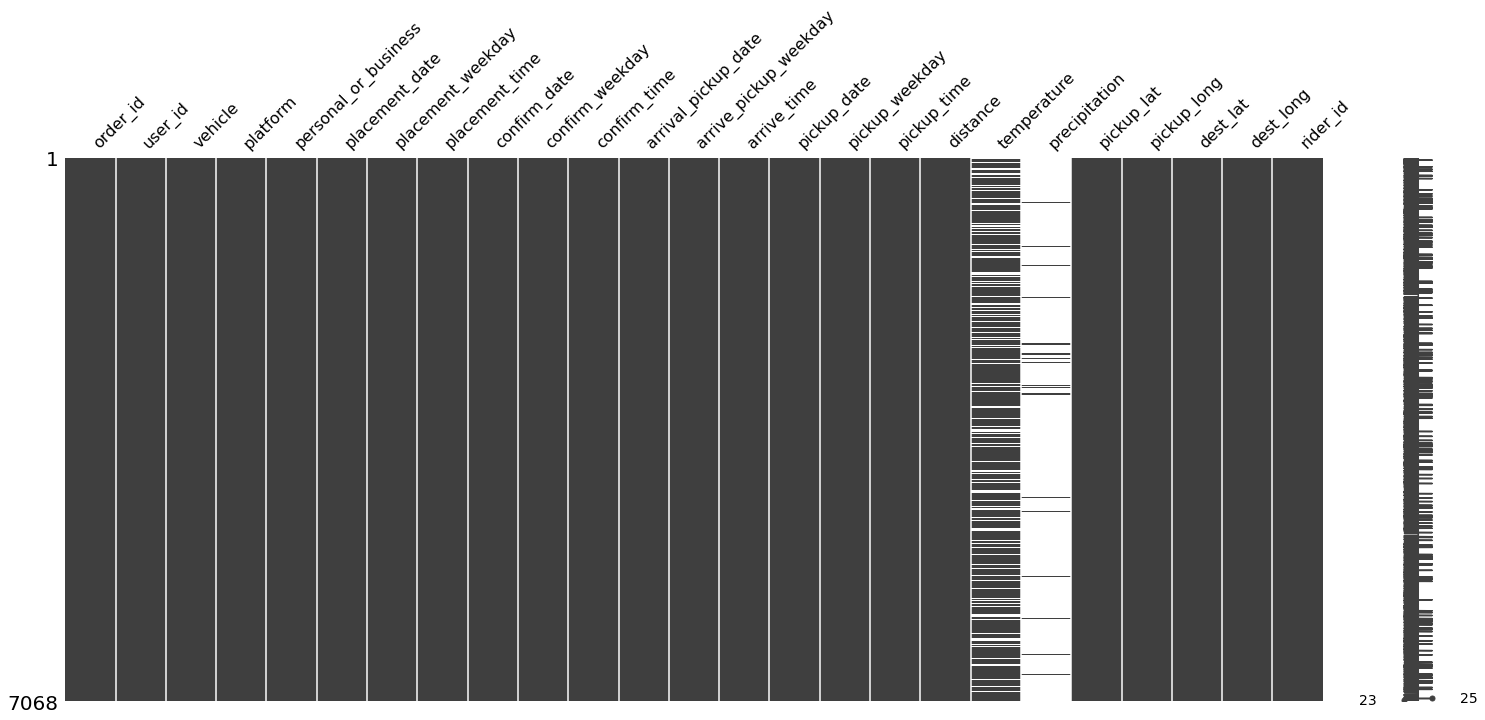

In [33]:
msno.matrix(test)

In [34]:
test.drop(columns="precipitation", inplace=True)
# Precipitation is messed up

In [35]:
test.temperature.fillna(test.temperature.mean(), inplace=True)
# Temperature is mostly ok

In [36]:
test.head()

,order_id,user_id,vehicle,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,...,pickup_date,pickup_weekday,pickup_time,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id
0,19248,3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,27,3,5:06:47 PM,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,192
1,12736,3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,17,5,1:25:37 PM,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,868
2,768,2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,27,4,11:57:54 AM,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,26
3,15332,2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,17,1,2:16:52 PM,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,685
4,21373,1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,11,2,11:56:04 AM,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,858


In [37]:
test.groupby('platform').distance.mean()

platform
1    9.451477
2    8.937500
3    9.489776
4    8.666667
Name: distance, dtype: float64

In [38]:
test.groupby('vehicle').distance.mean()

vehicle
Bike    9.45897
Name: distance, dtype: float64

In [39]:
bool_2 = test['placement_date'] == test['arrival_pickup_date']
test[~bool_2]

,order_id,user_id,vehicle,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,...,pickup_date,pickup_weekday,pickup_time,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id


In [40]:
def convert_time(time):
    #time is in the form "XX:XX:XX AM/PM" or "X:XX:XX AM/PM". Convert it to a seconds format.
    #for example, "1:00:00 AM" is converted to 3600. "1:00:00 PM" is converted to 46800.
    
    time_one_twelve = time[:-3] 
    if time_one_twelve[1] == ":":
        time_one_twelve = "0" + time_one_twelve[:]
    #this is the part consisting of "XX:XX:XX"
    
    ampm = time[-2:] #this is the part consisting of "AM/PM"
    
    if ampm == 'AM':
        return convert_am_time(time_one_twelve)
    elif ampm == 'PM':
        return convert_am_time(time_one_twelve) + 3600 * 12
    else:
        return -1 #this should never happen when your input is valid, it's to deal with naughty inputs

In [41]:
def convert_am_time(time_one_twelve):
    hour_string = time_one_twelve[:2]
    minute_string = time_one_twelve[3:5]
    second_string = time_one_twelve[6:8]
    
    if hour_string == "12":
        hour_int = 0
    else:
        hour_int = convert_str_to_int(hour_string)
    minute_int = convert_str_to_int(minute_string)
    second_int = convert_str_to_int(second_string)
    
    return 3600 * hour_int + 60 * minute_int + second_int

In [42]:
def convert_str_to_int(string):
    # Precondition: string has length 2 and should only consist of digits
    if string[0] == "0":
        return int(string[1])
    return int(string)

In [43]:
test['placement_time'] = test.apply(lambda x: convert_time(x.placement_time), axis=1)
test['pickup_time'] = test.apply(lambda x: convert_time(x.pickup_time), axis=1)
test['confirm_time'] = test.apply(lambda x: convert_time(x.confirm_time), axis=1)
test['arrive_time'] = test.apply(lambda x: convert_time(x.arrive_time), axis=1)

In [44]:
test[["placement_time","confirm_time", "arrive_time", "pickup_time"]]

,placement_time,confirm_time,arrive_time,pickup_time
0,60250,60269,60784,61607
1,46655,46757,48027,48337
2,40094,41105,41600,43074
3,49895,50007,50561,51412
4,41428,41685,42439,42964
...,...,...,...,...
7063,38149,38224,38413,38898
7064,53982,54057,55117,55304
7065,53112,53136,54015,54472
7066,55106,55185,56447,56795


In [45]:
test['placement_to_confirm_time'] = test.confirm_time - test.placement_time
#first time interval
test['confirm_to_pickup_time'] = test.pickup_time - test.confirm_time
#second time interval

In [46]:
test.dtypes

order_id                        int64
user_id                         int64
vehicle                      category
platform                     category
personal_or_business         category
placement_date                  int64
placement_weekday               int64
placement_time                  int64
confirm_date                    int64
confirm_weekday                 int64
confirm_time                    int64
arrival_pickup_date             int64
arrive_pickup_weekday           int64
arrive_time                     int64
pickup_date                     int64
pickup_weekday                  int64
pickup_time                     int64
distance                        int64
temperature                   float64
pickup_lat                    float64
pickup_long                   float64
dest_lat                      float64
dest_long                     float64
rider_id                        int64
placement_to_confirm_time       int64
confirm_to_pickup_time          int64
dtype: objec

In [47]:
print(convert_time("11:59:59 AM"))
print(convert_time("12:00:01 PM"))
print(convert_time("11:59:59 PM"))
print(convert_time("12:00:01 AM"))

43199
43201
86399
1


In [48]:
test.to_pickle("clean-data/test.pkl")